# Импорт необходимых библиотек

In [ ]:
import keras
from keras.layers import Dense
from keras.models import Sequential

from sklearn.preprocessing import MinMaxScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Преобразование категорий в числа

In [ ]:
X_train = pd.read_csv("../content/train.csv")

X_train = X_train.fillna(0)

X_train['MSZoning'] = X_train['MSZoning'].astype('category')
X_train['MSZoning'] = X_train['MSZoning'].cat.rename_categories({'A': 0, 'C': 1, 'FV': 2, 'I': 3, 'RH': 4, 'RL': 5, 'RP': 6, 'RM': 7})
X_train = X_train.drop('MSZoning', 1)
X_train = X_train.drop('MSSubClass', 1)

X_train['Street'] = X_train['Street'].astype('category')
X_train['Street'] = X_train['Street'].cat.rename_categories({'Grvl': 0, 'Pave': 1})

X_train['Alley'] = X_train['Alley'].astype('category')
X_train['Alley'] = X_train['Alley'].cat.rename_categories({'Grvl': 1, 'Pave': 2})

X_train['LotShape'] = X_train['LotShape'].astype('category')
X_train['LotShape'] = X_train['LotShape'].cat.rename_categories({'Reg': 0, 'IR1': 1, 'IR2': 2, 'IR3': 3})

X_train['LandContour'] = X_train['LandContour'].astype('category')
X_train['LandContour'] = X_train['LandContour'].cat.rename_categories({'Lvl': 0, 'Bnk': 1, 'HLS': 2, 'Low': 3})

X_train['Utilities'] = X_train['Utilities'].astype('category')
X_train['Utilities'] = X_train['Utilities'].cat.rename_categories({'AllPub': 0, 'NoSewr': 1, 'NoSeWa': 2, 'ELO': 3})

X_train['LotConfig'] = X_train['LotConfig'].astype('category')
X_train['LotConfig'] = X_train['LotConfig'].cat.rename_categories({'Inside': 0, 'Corner': 1, 'CulDSac': 2, 'FR2': 3, 'FR3': 4})

X_train['LandSlope'] = X_train['LandSlope'].astype('category')
X_train['LandSlope'] = X_train['LandSlope'].cat.rename_categories({'Gtl': 0, 'Mod': 1, 'Sev': 2})

X_train['Neighborhood'] = X_train['Neighborhood'].astype('category')
X_train['Neighborhood'] = X_train['Neighborhood'].cat.rename_categories({'Blmngtn': 0, 'Blueste': 1, 'BrDale': 2, 'BrkSide': 3, 'ClearCr': 4, 'CollgCr': 5,
                                                                         'Crawfor': 6, 'Edwards': 7, 'Gilbert': 8, 'IDOTRR': 9, 'MeadowV': 10, 'Mitchel': 11,
                                                                         'NAmes': 12, 'NoRidge': 13, 'NPkVill': 14, 'NridgHt': 15, 'NWAmes': 16, 'OldTown': 17,
                                                                         'SWISU': 18, 'Sawyer': 19, 'SawyerW': 20, 'Somerst': 21, 'StoneBr': 22, 'Timber': 23, 'Veenker': 24})

X_train = X_train.drop('Condition1', 1)
X_train = X_train.drop('Condition2', 1)

X_train['BldgType'] = X_train['BldgType'].astype('category')
X_train['BldgType'] = X_train['BldgType'].cat.rename_categories({'1Fam': 0, '2FmCon': 1, 'Duplx': 2, 'TwnhsE': 3, 'TwnhsI': 4})

X_train['HouseStyle'] = X_train['HouseStyle'].astype('category')
X_train['HouseStyle'] = X_train['HouseStyle'].cat.rename_categories({'1Story': 0, '1.5Fin': 1, '1.5Unf': 2, '2Story': 3, '2.5Fin': 4, '2.5Unf': 5, 'SFoyer': 6, 'SLvl': 7})

X_train['RoofStyle'] = X_train['RoofStyle'].astype('category')
X_train['RoofStyle'] = X_train['RoofStyle'].cat.rename_categories({'Flat': 0, 'Gable': 1, 'Gambrel': 2, 'Hip': 3, 'Mansard': 4, 'Shed': 5})

X_train['RoofMatl'] = X_train['RoofMatl'].astype('category')
X_train['RoofMatl'] = X_train['RoofMatl'].cat.rename_categories({'ClyTile': 0, 'CompShg': 1, 'Membran': 2, 'Metal': 3, 'Roll': 4, 'Tar&Grv': 5, 'WdShake': 6, 'WdShngl': 7})

X_train['Exterior1st'] = X_train['Exterior1st'].astype('category')
X_train['Exterior1st'] = X_train['Exterior1st'].cat.rename_categories({'AsbShng': 0, 'AsphShn': 1, 'BrkComm': 2, 'BrkFace': 3, 'CBlock': 4, 'CemntBd': 5,
                                                                       'HdBoard': 6, 'ImStucc': 7, 'MetalSd': 8, 'Other': 9, 'Plywood': 10, 'PreCast': 11,
                                                                       'Stone': 12, 'Stucco': 13, 'VinylSd': 14, 'Wd Sdng': 15, 'WdShing': 16})

X_train['Exterior2nd'] = X_train['Exterior2nd'].astype('category')
X_train['Exterior2nd'] = X_train['Exterior2nd'].cat.rename_categories({'AsbShng': 0, 'AsphShn': 1, 'BrkComm': 2, 'BrkFace': 3, 'CBlock': 4, 'CemntBd': 5, 'HdBoard': 6, 'ImStucc': 7, 'MetalSd': 8, 'Other': 9, 'Plywood': 10, 'PreCast': 11, 'Stone': 12, 'Stucco': 13, 'VinylSd': 14, 'Wd Sdng': 15, 'WdShing': 16})

X_train.loc[X_train['MasVnrType'] == 0, 'MasVnrType'] = 5
X_train['MasVnrType'] = X_train['MasVnrType'].astype('category')
X_train['MasVnrType'] = X_train['MasVnrType'].cat.rename_categories({'BrkCmn': 0, 'BrkFace': 1, 'CBlock': 2, 'None': 3, 'Stone': 4})
X_train.loc[X_train['MasVnrType'] == 5, 'MasVnrType'] = 3

X_train['ExterQual'] = X_train['ExterQual'].astype('category')
X_train['ExterQual'] = X_train['ExterQual'].cat.rename_categories({'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'Po': 4})

X_train['ExterCond'] = X_train['ExterCond'].astype('category')
X_train['ExterCond'] = X_train['ExterCond'].cat.rename_categories({'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'Po': 4})

X_train['Foundation'] = X_train['Foundation'].astype('category')
X_train['Foundation'] = X_train['Foundation'].cat.rename_categories({'BrkTil': 0, 'CBlock': 1, 'PConc': 2, 'Slab': 3, 'Stone': 4, 'Wood': 5})

X_train.loc[X_train['BsmtQual'] == 0, 'BsmtQual'] = 5
X_train['BsmtQual'] = X_train['BsmtQual'].astype('category')
X_train['BsmtQual'] = X_train['BsmtQual'].cat.rename_categories({'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'Po': 4})

X_train.loc[X_train['BsmtCond'] == 0, 'BsmtCond'] = 5
X_train['BsmtCond'] = X_train['BsmtCond'].astype('category')
X_train['BsmtCond'] = X_train['BsmtCond'].cat.rename_categories({'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'Po': 4})

X_train.loc[X_train['BsmtExposure'] == 0, 'BsmtExposure'] = 4
X_train['BsmtExposure'] = X_train['BsmtExposure'].astype('category')
X_train['BsmtExposure'] = X_train['BsmtExposure'].cat.rename_categories({'Gd': 0, 'Av': 1, 'Mn': 2, 'No': 3})

X_train.loc[X_train['BsmtFinType1'] == 0, 'BsmtFinType1'] = 6
X_train['BsmtFinType1'] = X_train['BsmtFinType1'].astype('category')
X_train['BsmtFinType1'] = X_train['BsmtFinType1'].cat.rename_categories({'GLQ': 0, 'ALQ': 1, 'BLQ': 2, 'Rec': 3, 'LwQ': 4, 'Unf': 5})

X_train.loc[X_train['BsmtFinType2'] == 0, 'BsmtFinType2'] = 6
X_train['BsmtFinType2'] = X_train['BsmtFinType2'].astype('category')
X_train['BsmtFinType2'] = X_train['BsmtFinType2'].cat.rename_categories({'GLQ': 0, 'ALQ': 1, 'BLQ': 2, 'Rec': 3, 'LwQ': 4, 'Unf': 5})

X_train['Heating'] = X_train['Heating'].astype('category')
X_train['Heating'] = X_train['Heating'].cat.rename_categories({'Floor': 0, 'GasA': 1, 'GasW': 2, 'Grav': 3, 'OthW': 4, 'Wall': 5})

X_train['HeatingQC'] = X_train['HeatingQC'].astype('category')
X_train['HeatingQC'] = X_train['HeatingQC'].cat.rename_categories({'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'Po': 4})

X_train['CentralAir'] = X_train['CentralAir'].astype('category')
X_train['CentralAir'] = X_train['CentralAir'].cat.rename_categories({'N': 0, 'Y': 1})

X_train['Electrical'] = X_train['Electrical'].astype('category')
X_train['Electrical'] = X_train['Electrical'].cat.rename_categories({'SBrkr': 1, 'FuseA': 2, 'FuseF': 3, 'FuseP': 4, 'Mix': 5})

X_train['KitchenQual'] = X_train['KitchenQual'].astype('category')
X_train['KitchenQual'] = X_train['KitchenQual'].cat.rename_categories({'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'Po': 4})

X_train['Functional'] = X_train['Functional'].astype('category')
X_train['Functional'] = X_train['Functional'].cat.rename_categories({'Typ': 0, 'Min1': 1, 'Min2': 2, 'Mod': 3, 'Maj1': 4, 'Maj2': 5, 'Sev': 6, 'Sal': 7})

X_train['FireplaceQu'] = X_train['FireplaceQu'].astype('category')
X_train['FireplaceQu'] = X_train['FireplaceQu'].cat.rename_categories({'Ex': 1, 'Gd': 2, 'TA': 3, 'Fa': 4, 'Po': 5})

X_train['GarageType'] = X_train['GarageType'].astype('category')
X_train['GarageType'] = X_train['GarageType'].cat.rename_categories({'2Types': 1, 'Attchd': 2, 'Basment': 3, 'BuiltIn': 4, 'CarPort': 5, 'Detchd': 6})

X_train['GarageFinish'] = X_train['GarageFinish'].astype('category')
X_train['GarageFinish'] = X_train['GarageFinish'].cat.rename_categories({'Fin': 1, 'RFn': 2, 'Unf': 3})

X_train['GarageQual'] = X_train['GarageQual'].astype('category')
X_train['GarageQual'] = X_train['GarageQual'].cat.rename_categories({'Ex': 1, 'Gd': 2, 'TA': 3, 'Fa': 4, 'Po': 5})

X_train['GarageCond'] = X_train['GarageCond'].astype('category')
X_train['GarageCond'] = X_train['GarageCond'].cat.rename_categories({'Ex': 1, 'Gd': 2, 'TA': 3, 'Fa': 4, 'Po': 5})

X_train['PavedDrive'] = X_train['PavedDrive'].astype('category')
X_train['PavedDrive'] = X_train['PavedDrive'].cat.rename_categories({'Y': 0, 'P': 1, 'N': 2})

X_train['PoolQC'] = X_train['PoolQC'].astype('category')
X_train['PoolQC'] = X_train['PoolQC'].cat.rename_categories({'Ex': 1, 'Gd': 2, 'TA': 3, 'Fa': 4})

X_train['Fence'] = X_train['Fence'].astype('category')
X_train['Fence'] = X_train['Fence'].cat.rename_categories({'GdPrv': 1, 'MnPrv': 2, 'GdWo': 3, 'MnWw': 4})

X_train['MiscFeature'] = X_train['MiscFeature'].astype('category')
X_train['MiscFeature'] = X_train['MiscFeature'].cat.rename_categories({'Elev': 1, 'Gar2': 2, 'Othr': 3, 'Shed': 4, 'TenC': 5})

X_train = X_train.drop(X_train[X_train.SaleCondition != 'Normal'].index)

X_train = X_train.drop('MoSold', 1)
X_train = X_train.drop('YrSold', 1)
X_train = X_train.drop('SaleType', 1)
X_train = X_train.drop('SaleCondition', 1)


X_train = X_train.drop('Id', 1)


# Удаление аномальных данных


In [ ]:
X_train = X_train.drop(X_train[X_train.SalePrice > 450000].index)
X_train = X_train.drop(X_train[X_train.GrLivArea > 3000].index)
X_train = X_train.drop(X_train[X_train.MiscVal > 2600].index)
X_train = X_train.drop(X_train[X_train.TotalBsmtSF > 3000].index)

# Нормализация данных

In [ ]:
price = X_train['SalePrice'].to_numpy()
coef = np.linalg.norm(price)
price = price / coef;
X_train = X_train.drop('SalePrice', 1)

X_mat = np.matrix(X_train)

x_scaler = MinMaxScaler()
x_scaler.fit(X_mat)

col_names = X_train.keys()
X_train = pd.DataFrame(x_scaler.transform(X_mat), columns=col_names)

X_test = X_train.iloc[1000:, :]
X_train = X_train.iloc[:1000, :]

Y_train = price[:1000]
Y_test = price[1000:]

In [ ]:
coef


6282996.531418986

# Создание модели

In [ ]:
model = Sequential()

model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],), kernel_initializer='normal'))
model.add(Dense(256, activation='relu', kernel_initializer='normal'))
model.add(Dense(128, activation='relu', kernel_initializer='normal'))

model.add(Dense(1, activation='linear'))

In [ ]:
model.summary()

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_263 (Dense)            (None, 512)               36864     
_________________________________________________________________
dense_264 (Dense)            (None, 256)               131328    
_________________________________________________________________
dense_265 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_266 (Dense)            (None, 1)                 129       
Total params: 201,217
Trainable params: 201,217
Non-trainable params: 0
_________________________________________________________________


# Обучение модели

In [ ]:
model.compile(optimizer='adam', loss='mean_absolute_percentage_error')
history = model.fit(X_train, Y_train, epochs=30, batch_size=5, verbose=2)

Epoch 1/30
200/200 - 1s - loss: 56.1007
Epoch 2/30
200/200 - 0s - loss: 18.2671
Epoch 3/30
200/200 - 0s - loss: 13.3020
Epoch 4/30
200/200 - 0s - loss: 14.1314
Epoch 5/30
200/200 - 0s - loss: 11.6246
Epoch 6/30
200/200 - 0s - loss: 10.6166
Epoch 7/30
200/200 - 0s - loss: 10.7603
Epoch 8/30
200/200 - 0s - loss: 11.2743
Epoch 9/30
200/200 - 0s - loss: 9.7607
Epoch 10/30
200/200 - 0s - loss: 8.9428
Epoch 11/30
200/200 - 0s - loss: 9.6686
Epoch 12/30
200/200 - 0s - loss: 9.8946
Epoch 13/30
200/200 - 0s - loss: 8.8145
Epoch 14/30
200/200 - 0s - loss: 8.1721
Epoch 15/30
200/200 - 0s - loss: 8.6785
Epoch 16/30
200/200 - 0s - loss: 8.6351
Epoch 17/30
200/200 - 0s - loss: 8.7010
Epoch 18/30
200/200 - 0s - loss: 8.2025
Epoch 19/30
200/200 - 0s - loss: 8.2721
Epoch 20/30
200/200 - 0s - loss: 8.7371
Epoch 21/30
200/200 - 0s - loss: 8.1972
Epoch 22/30
200/200 - 0s - loss: 7.8458
Epoch 23/30
200/200 - 0s - loss: 7.4952
Epoch 24/30
200/200 - 0s - loss: 7.5133
Epoch 25/30
200/200 - 0s - loss: 7.2761
E

<function matplotlib.pyplot.show>

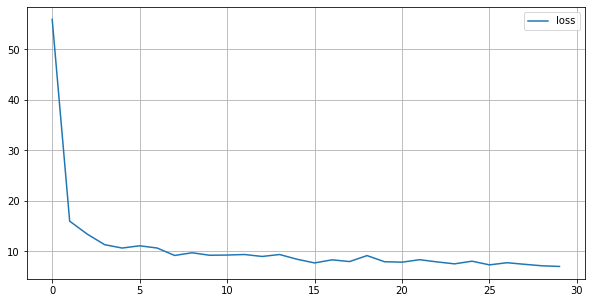

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,5))
plt.grid(True)
plt.show

# Предсказывание тестовых данных

In [ ]:
pred_test = model.predict(X_test)
pred_train = model.predict(X_train)
model.evaluate(X_test, Y_test)


6/6 [==============================] - 0s 2ms/step - loss: 8.0359


8.035889625549316

# Анализ предсказанных цен

In [ ]:
error = 0

for i in range(len(pred_test)):
  error += abs(pred_test[i]*coef - Y_test[i]*coef)
  
print(error / len(pred_test), " - Cреднее відхилення від реальної ціни ")
print(Y_test.mean() * coef, " - Середня реальна ціна будинку ")

[13458.943]  - Cреднее відхилення від реальної ціни 
174563.11666666667  - Середня реальна ціна будинку 


# Предсказание тренировочных данных

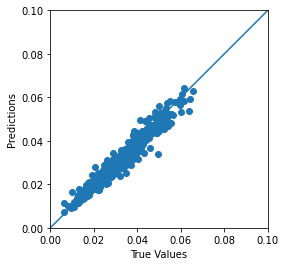

In [ ]:
b = plt.axes(aspect='equal')
plt.scatter(Y_train, pred_train.flatten())
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 0.1]
plt.xlim(lims)
plt.ylim(lims)
_b = plt.plot(lims, lims)

# Предсказание тестовых данных

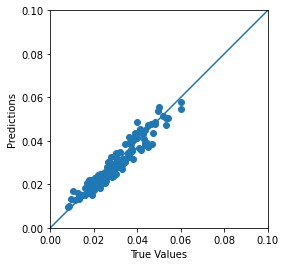

In [ ]:
a = plt.axes(aspect='equal')
plt.scatter(Y_test, pred_test.flatten())
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 0.1]
plt.xlim(lims)
plt.ylim(lims)
_a = plt.plot(lims, lims)

# Сохранение модели и весов

In [ ]:
model = keras.models.load_model('../content/save/model_3_m')
model.load_weights('../content/save/model_3_w/')


In [ ]:
model.save_weights('../save/model_3_w/')
model.save('../save/model_3_m')

INFO:tensorflow:Assets written to: ../save/model_3_m/assets


In [ ]:
import joblib

joblib.dump(x_scaler, '../content/scaler_updated.save')

['../content/scaler_updated.save']

In [ ]:
!tar --totals -cvf ../content/model_29_05.tar ../save/model_3_m ../save/model_3_w/

tar: Removing leading `../' from member names
../save/model_3_m/
../save/model_3_m/assets/
../save/model_3_m/keras_metadata.pb
../save/model_3_m/saved_model.pb
../save/model_3_m/variables/
../save/model_3_m/variables/variables.data-00000-of-00001
../save/model_3_m/variables/variables.index
../save/model_3_w/
../save/model_3_w/checkpoint
../save/model_3_w/.index
../save/model_3_w/.data-00000-of-00001
Total bytes written: 4986880 (4.8MiB, 889MiB/s)


In [ ]:
!tar -C ../content -xvf ../content/best4.tar

save/model_3_m/
save/model_3_m/variables/
save/model_3_m/variables/variables.index
save/model_3_m/variables/variables.data-00000-of-00001
save/model_3_m/saved_model.pb
save/model_3_m/assets/
save/model_3_w/
save/model_3_w/checkpoint
save/model_3_w/.index
save/model_3_w/.data-00000-of-00001


In [ ]:
!rm -rf ../content/save

In [ ]:
!pip install sklearn --upgrade --force

In [ ]:
!nvidia-smi -L

GPU 0: Tesla P4 (UUID: GPU-d8ed36c6-2a07-30fc-c403-ec0c38723bd4)
